In [1]:
import os
import json

path = '.\\content\\DATA'

dirs = os.listdir(path)
label_files = [os.path.join(path, DATA_dir, lablel_file) for DATA_dir in os.listdir(path) for lablel_file in os.listdir(os.path.join(path, DATA_dir)) if lablel_file.endswith('.json')]

for label_file in label_files:
    print(label_file)

.\content\DATA\00048035\00048035.json
.\content\DATA\01142281\01142281.json
.\content\DATA\016047953\106047953.json
.\content\DATA\01990231\01990231.json
.\content\DATA\03877078\03877078.json
.\content\DATA\05609172\05609172.json
.\content\DATA\06280116\06280116.json
.\content\DATA\10874765\10874765.json
.\content\DATA\10929576\10929576.json
.\content\DATA\11830358\11830358.json
.\content\DATA\13549073\13549073.json
.\content\DATA\15144615\151446151.json


In [2]:
# dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes', '_via_data_format_version', '_via_image_id_list'])

data = list()

for label_file in label_files:
    with open(label_file, mode='r', encoding='utf-8') as f:
        load_json = json.load(f)

        for key in load_json['_via_img_metadata']:
            
            this_img_data = load_json['_via_img_metadata'][key]

            temp_dict = dict()
            temp_dict['filename'] = this_img_data['filename']
            temp_dict['filepath'] = os.path.join(path, this_img_data['filename'].split('_')[0], this_img_data['filename'])
            temp_dict['x_label'] = [k['shape_attributes']['all_points_x'] for k in this_img_data['regions']] # [[12], [12], ...]
            temp_dict['y_label'] = [k['shape_attributes']['all_points_y'] for k in this_img_data['regions']] # [[12], [12], ...]
            temp_dict['position'] = [k['region_attributes']['position'] for k in this_img_data['regions']]   # ['L1', 'L2', ...]
            temp_dict['type'] = [k['region_attributes']['type'] for k in this_img_data['regions']]           # ['normal', compre, ...] 

            data.append(temp_dict)

        # print(load_json['_via_image_id_list'])
print(data[0])
print(len(data))
print([k['filename'] for k in data for idx in range(len(k['x_label'])) if len(k['x_label'][idx]) != 12 and k['position'] != 'S'])

{'filename': '00048035_FILE0.bmp', 'filepath': '.\\content\\DATA\\00048035\\00048035_FILE0.bmp', 'x_label': [[399, 430, 458, 470, 535, 567, 591, 554, 523, 513, 477, 442], [481, 511, 529, 537, 586, 652, 684, 657, 614, 597, 571, 533], [550, 577, 606, 620, 651, 710, 781, 755, 719, 693, 678, 584], [629, 649, 682, 683, 748, 818, 863, 847, 823, 805, 754, 699], [692, 708, 733, 726, 768, 850, 922, 913, 884, 868, 843, 802], [745, 753, 765, 753, 795, 827, 970, 958, 942, 935, 829, 786], [762, 773, 776, 750, 811, 933, 980, 977, 975, 967, 919, 835], [767, 775, 765, 747, 796, 833, 966, 980, 987, 979, 930, 847], [762, 763, 761, 742, 768, 897, 971, 978, 982, 980, 948, 830], [750, 766, 751, 739, 792, 872, 964, 982, 987, 987, 935, 838], [743, 744, 736, 719, 784, 857, 942, 951, 967, 976, 904, 816], [677, 672, 657, 642, 696, 774, 838, 868, 896, 945, 845, 764], [603, 574, 545, 490, 536, 629, 669, 697, 768, 824, 761, 683], [418, 400, 375, 351, 406, 512, 559, 591, 632, 651, 577, 476], [309, 274, 255, 233, 31

In [3]:
print('number of labeled data = ' + str(len(data)))

cnt = 0
for d in data:
    cnt += len(d['x_label'])

print('number of labeled vertex = ' + str(cnt))

number of labeled data = 94
number of labeled vertex = 977


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import random

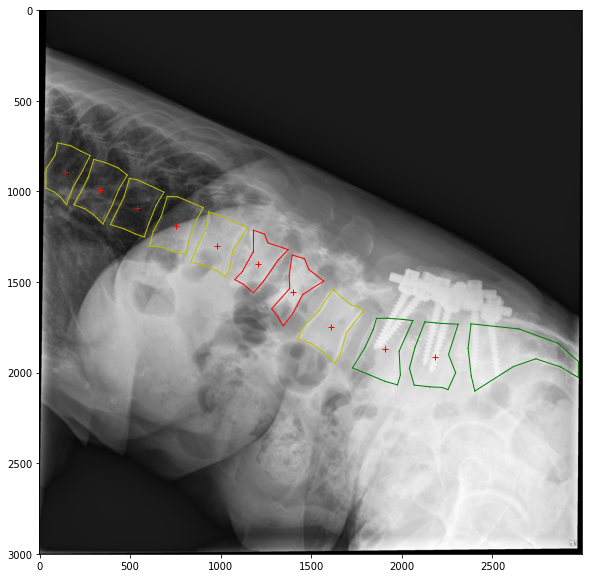

In [5]:
random_id = random.randint(0, len(data)-1)

img = PIL.Image.open(data[random_id]['filepath'])
plt.figure(figsize=(10,10))
implot = plt.imshow(img, cmap='gray')

# use dict as switch statement
get_line_style = {
    'normal': 'y-',
    'compre': 'r-',
    'burst' : 'b-',
    'unsure': 'g-',
}

for idx in range(len(data[random_id]['x_label'])):

    line_style =  get_line_style[data[random_id]['type'][idx]]

    for idx_dot in range(len(data[random_id]['x_label'][idx])):
        x1 = data[random_id]['x_label'][idx][idx_dot]
        y1 = data[random_id]['y_label'][idx][idx_dot]
        x2 = data[random_id]['x_label'][idx][idx_dot + 1 if idx_dot + 1 < len(data[random_id]['x_label'][idx]) else 0]
        y2 = data[random_id]['y_label'][idx][idx_dot + 1 if idx_dot + 1 < len(data[random_id]['x_label'][idx]) else 0]
        # print([x1, y1], [x2, y2])
        plt.plot([x1, x2], [y1, y2], line_style, linewidth = 1)
    
    if data[random_id]['position'][idx] != 'S':
        x_mid = sum(data[random_id]['x_label'][idx])/len(data[random_id]['x_label'][idx])
        y_mid = sum(data[random_id]['y_label'][idx])/len(data[random_id]['y_label'][idx])
        plt.plot(x_mid, y_mid, 'r+')

plt.show()

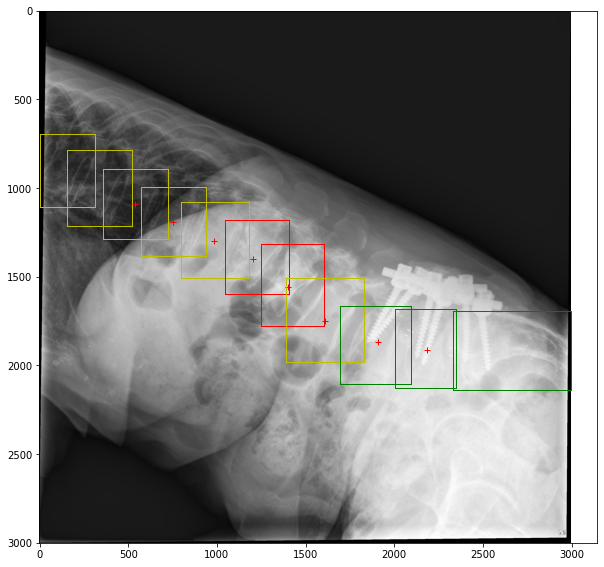

In [6]:
plt.figure(figsize=(10,10))
implot = plt.imshow(img, cmap='gray')

# height, width above/below the max/min point
width = 35
height = 35

boxs = []
mids = []

for idx in range(len(data[random_id]['x_label'])):

    line_style =  get_line_style[data[random_id]['type'][idx]]

    x_max = min(max(data[random_id]['x_label'][idx]) + width, img.size[0])
    x_min = max(min(data[random_id]['x_label'][idx]) - width, 0)
    y_max = min(max(data[random_id]['y_label'][idx]) + height, img.size[1])
    y_min = max(min(data[random_id]['y_label'][idx]) - height, 0)

    plt.plot([x_max, x_max],[y_max, y_min], line_style, linewidth = 1)
    plt.plot([x_min, x_min],[y_max, y_min], line_style, linewidth = 1)
    plt.plot([x_max, x_min],[y_max, y_max], line_style, linewidth = 1)
    plt.plot([x_max, x_min],[y_min, y_min], line_style, linewidth = 1)

    # store the center point (except for S)
    if data[random_id]['position'][idx] != 'S':

        x_mid = sum(data[random_id]['x_label'][idx])/len(data[random_id]['x_label'][idx])
        y_mid = sum(data[random_id]['y_label'][idx])/len(data[random_id]['y_label'][idx])

        plt.plot(x_mid, y_mid, 'r+')

        boxs.append((x_min, y_min, x_max, y_max))
        mids.append((x_mid, y_mid))

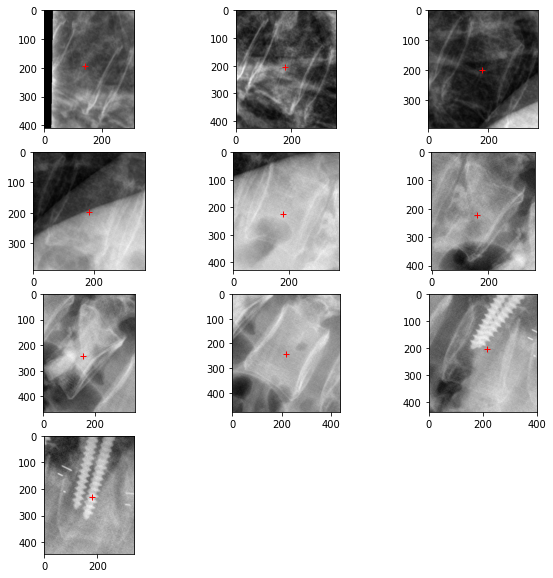

In [7]:
plt.figure(figsize = (10, 10))

nrows = int(len(boxs)/3)+1
ncols = 3

for idx, box in enumerate(boxs):

    # subplot index start from 1
    plt.subplot(nrows, ncols, idx+1)
    plt.imshow(img.crop(box), cmap='gray')
    mid = ( mids[idx][0]-box[0], mids[idx][1]-box[1] )
    # unpack mid
    plt.plot(*mid, 'r+')

In [8]:
import pandas as pd
import numpy as np

import shutil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
data_list = []

print('width exceed = ', width)
print('height exceed = ', height)

for d in data:
    for (x_labels, y_labels, type_label) in zip(d['x_label'], d['y_label'], d['type']):

        x_mid = sum(x_labels)/len(x_labels)
        y_mid = sum(y_labels)/len(y_labels)

        x_max = min(max(x_labels) + width, img.size[0])
        x_min = max(min(x_labels) - width, 0)
        y_max = min(max(y_labels) + height, img.size[1])
        y_min = max(min(y_labels) - height, 0)

        # cat0: vertex cat1:S
        vertex_type = 'vertex' if d['type'] != 'S' else 'S'

        data_list.append([d['filename'], vertex_type, x_min, x_max, y_min, y_max, d['filepath']])

df = pd.DataFrame(data_list, columns=['filename', 'type', 'xmin', 'xmax', 'ymin', 'ymax', 'filepath'])
df.head(10)

width exceed =  35
height exceed =  35


,filename,type,xmin,xmax,ymin,ymax,filepath
0,00048035_FILE0.bmp,vertex,364,626,91,357,.\content\DATA\00048035\00048035_FILE0.bmp
1,00048035_FILE0.bmp,vertex,446,719,223,527,.\content\DATA\00048035\00048035_FILE0.bmp
2,00048035_FILE0.bmp,vertex,515,816,364,660,.\content\DATA\00048035\00048035_FILE0.bmp
3,00048035_FILE0.bmp,vertex,594,898,504,789,.\content\DATA\00048035\00048035_FILE0.bmp
4,00048035_FILE0.bmp,vertex,657,957,665,947,.\content\DATA\00048035\00048035_FILE0.bmp
5,00048035_FILE0.bmp,vertex,710,1005,850,1107,.\content\DATA\00048035\00048035_FILE0.bmp
6,00048035_FILE0.bmp,vertex,715,1015,1043,1278,.\content\DATA\00048035\00048035_FILE0.bmp
7,00048035_FILE0.bmp,vertex,712,1022,1220,1451,.\content\DATA\00048035\00048035_FILE0.bmp
8,00048035_FILE0.bmp,vertex,707,1017,1402,1648,.\content\DATA\00048035\00048035_FILE0.bmp
9,00048035_FILE0.bmp,vertex,704,1022,1600,1865,.\content\DATA\00048035\00048035_FILE0.bmp


In [10]:
img_width, img_height = img.size

def box_width(df):
    return int(df.xmax - df.xmin)
def box_height(df):
    return int(df.ymax - df.ymin)
def x_center(df):
    return int(df.xmin + (df.width/2))
def y_center(df):
    return int(df.ymin + (df.height/2))
def w_norm(df):
    return df/img_width
def h_norm(df):
    return df/img_height

le = LabelEncoder()
le.fit(df['type'])
print(le.classes_)
labels = le.transform(df['type'])
df['labels'] = labels

df['width'] = df.apply(box_width, axis=1)
df['height'] = df.apply(box_height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

df.head(30)

['vertex']


,filename,type,xmin,xmax,ymin,ymax,filepath,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
0,00048035_FILE0.bmp,vertex,364,626,91,357,.\content\DATA\00048035\00048035_FILE0.bmp,0,262,266,495,224,0.165220,0.087450,0.074642,0.088637
1,00048035_FILE0.bmp,vertex,446,719,223,527,.\content\DATA\00048035\00048035_FILE0.bmp,0,273,304,582,375,0.194259,0.091121,0.124958,0.101300
2,00048035_FILE0.bmp,vertex,515,816,364,660,.\content\DATA\00048035\00048035_FILE0.bmp,0,301,296,665,512,0.221963,0.100467,0.170610,0.098634
3,00048035_FILE0.bmp,vertex,594,898,504,789,.\content\DATA\00048035\00048035_FILE0.bmp,0,304,285,746,646,0.248999,0.101469,0.215262,0.094968
4,00048035_FILE0.bmp,vertex,657,957,665,947,.\content\DATA\00048035\00048035_FILE0.bmp,0,300,282,807,806,0.269359,0.100134,0.268577,0.093969
5,00048035_FILE0.bmp,vertex,710,1005,850,1107,.\content\DATA\00048035\00048035_FILE0.bmp,0,295,257,857,978,0.286048,0.098465,0.325891,0.085638
6,00048035_FILE0.bmp,vertex,715,1015,1043,1278,.\content\DATA\00048035\00048035_FILE0.bmp,0,300,235,865,1160,0.288718,0.100134,0.386538,0.078307
7,00048035_FILE0.bmp,vertex,712,1022,1220,1451,.\content\DATA\00048035\00048035_FILE0.bmp,0,310,231,867,1335,0.289386,0.103471,0.444852,0.076974
8,00048035_FILE0.bmp,vertex,707,1017,1402,1648,.\content\DATA\00048035\00048035_FILE0.bmp,0,310,246,862,1525,0.287717,0.103471,0.508164,0.081973
9,00048035_FILE0.bmp,vertex,704,1022,1600,1865,.\content\DATA\00048035\00048035_FILE0.bmp,0,318,265,863,1732,0.288051,0.106142,0.577141,0.088304


In [11]:
df_train, df_valid = train_test_split(df, test_size=0.1, random_state=13, shuffle=True)
print(df_train.shape, df_valid.shape)

os.mkdir('./content/bcc')
os.mkdir('./content/bcc/images/')
os.mkdir('./content/bcc/images/train/')
os.mkdir('./content/bcc/images/valid/')

os.mkdir('./content/bcc/labels/')
os.mkdir('./content/bcc/labels/train/')
os.mkdir('./content/bcc/labels/valid/')

def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
    filenames = []
    for filename in df.filename:
        filenames.append(filename)
    filenames = set(filenames)

    for filename in filenames:
        yolo_list = []

        for idx, row in df[df.filename == filename].iterrows():
            yolo_list.append([row.labels, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

        yolo_list = np.array(yolo_list)
        txt_filename = os.path.join(train_label_path, filename.split('.')[0]+'.txt')
        np.savetxt(txt_filename, yolo_list, fmt = ["%d", "%f", "%f", "%f", "%f"])

        local_img_path = os.path.join(img_path, filename.split('_')[0])
        shutil.copyfile(os.path.join(local_img_path, row.filename), os.path.join(train_img_path, row.filename))

src_img_path = '.\\content\\DATA'
src_label_path = ''

train_img_path = './content/bcc/images/train'
train_label_path = './content/bcc/labels/train'

valid_img_path = './content/bcc/images/valid'
valid_label_path = './content/bcc/labels/valid'

segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)

print('No. of Training images ', len(os.listdir('./content/bcc/images/train')))
print('No. of Training labels ', len(os.listdir('./content/bcc/labels/train')))

print('No. of valid images ', len(os.listdir('./content/bcc/images/valid')))
print('No. of valdi labels ', len(os.listdir('./content/bcc/labels/valid')))

(879, 16) (98, 16)
No. of Training images  94
No. of Training labels  94
No. of valid images  58
No. of valdi labels  58
